In [206]:
#Removing error warnings

import warnings
warnings.filterwarnings('ignore')

In [207]:
#Reading the data

import pandas as pd
data = pd.read_csv('segmentation data.csv')
data.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [208]:
#Determine the size of dataset

data.shape

(2000, 8)

In [209]:
#Checking for null values for each feature

data.isnull().sum()

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [210]:
#Description of dataset

data.describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1.000010e+08,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,5.774946e+02,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,1.000000e+08,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,1.000005e+08,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,1.000010e+08,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000015e+08,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000020e+08,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


<AxesSubplot:xlabel='ID', ylabel='Count'>

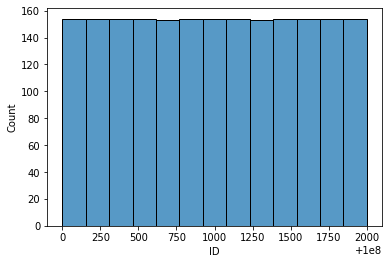

In [211]:
#displaying the effect of ID on classification

import seaborn as sns

sns.histplot(data=data, x='ID')

In [212]:
#ID is removed from the features

X = data.drop(['ID'], axis = 1)

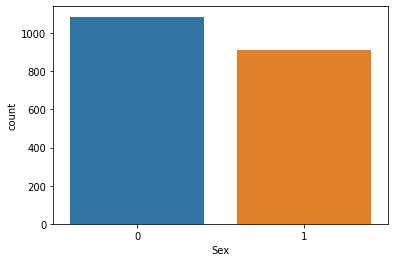

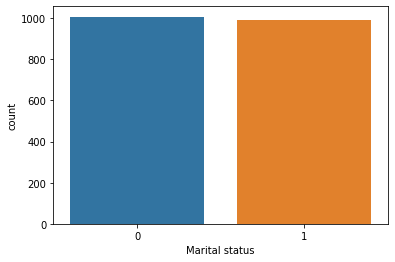

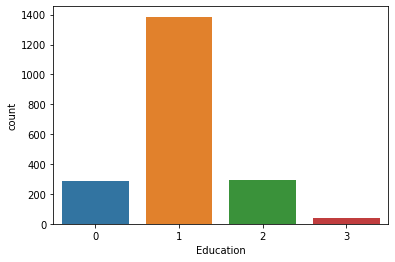

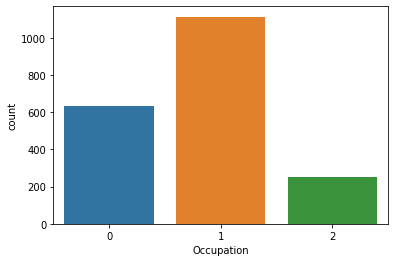

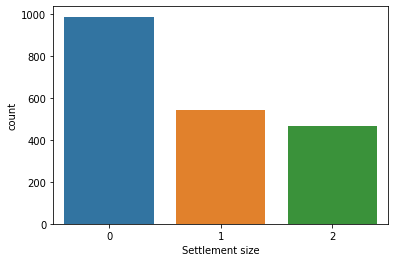

In [213]:
#Determining the distribution of data among classes excluding Age and Income

import matplotlib.pyplot as plt

cat_columns = ['Sex', 'Marital status', 'Education', 'Occupation', 'Settlement size']

for category in cat_columns:
    sns.countplot(data=data, x=category)
    plt.show()

<AxesSubplot:xlabel='Sex', ylabel='count'>

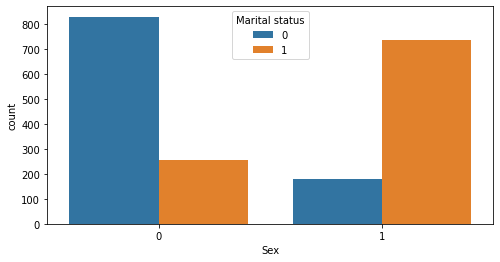

In [214]:
#relationship between Sex and Marital status
#Sex [0, 1] translates to [male, female]
#Marital status [0, 1] translates to [Single, Married]

plt.figure(figsize=(8,4))
sns.countplot(data=data, x='Sex', hue='Marital status')  


#Results show that females tend to be more married than males

<AxesSubplot:xlabel='Sex', ylabel='count'>

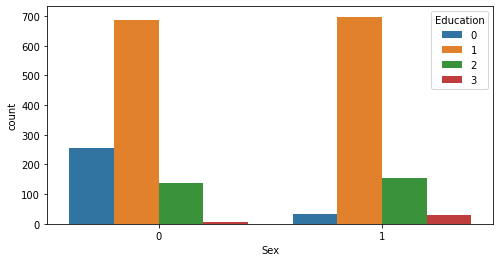

In [215]:
#relationship between Sex and Education
#Sex [0, 1] translates to [male, female]
#Education status [0, 1, 2, 3] translates to [other/unknown, high school, university, graduate school]

plt.figure(figsize=(8,4))
sns.countplot(data=data, x='Sex', hue='Education')  


#No concrete conclusion can be made from this graph

<AxesSubplot:xlabel='Sex', ylabel='count'>

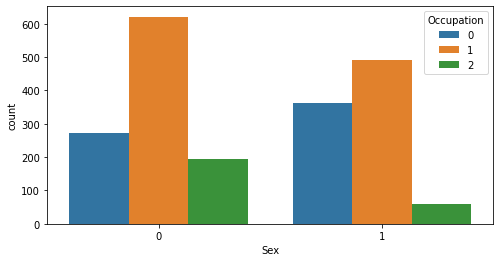

In [216]:
#relationship between Sex and Occupation
#Sex [0, 1] translates to [male, female]
#Education status [0, 1, 2] translates to [unemployed, employed, management]

plt.figure(figsize=(8,4))
sns.countplot(data=data, x='Sex', hue='Occupation')  


#Males tend to be more employed than females

<AxesSubplot:xlabel='Sex', ylabel='count'>

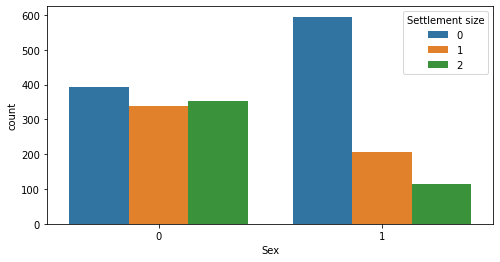

In [217]:
#relationship between Sex and Occupation
#Sex [0, 1] translates to [male, female]
#Settlement size [0, 1, 2] translates to [small city, medium-size city, big city]

plt.figure(figsize=(8,4))
sns.countplot(data=data, x='Sex', hue='Settlement size')  


#Female's tend to live in smaller cities

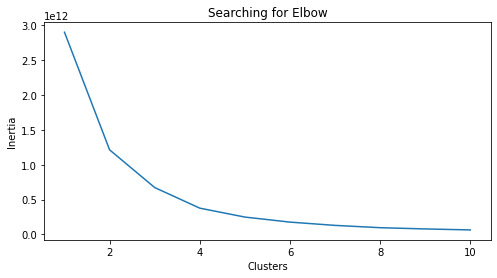

In [218]:
#Implementing K-means for cluster sizes in the range of 1-10


from sklearn.cluster import KMeans

clusters = []

for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

plt.show()


#Based on the graph, possible optimal cluster sizes are 4 or 6

Silhouette score: 0.543


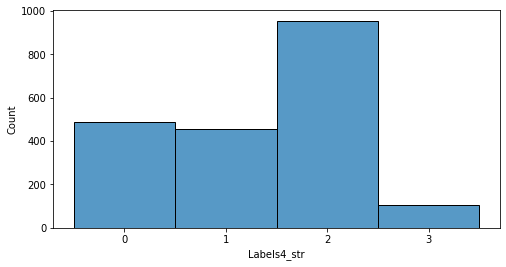

In [219]:
#Determining the amount of data in each cluster and the Silhouette score for 4 clusters
#Results show the group 3 cluster contains significantly less amount of data

km4 = KMeans(n_clusters=4, random_state=48, init='k-means++').fit(X)
X_km4 = X.copy()
X_km4['Labels4'] = km4.labels_

from sklearn.metrics import silhouette_score
score = silhouette_score(X, km4.labels_, random_state=48)
print(f"Silhouette score: {score:0.3f}")


X_km4['Labels4_str']= X_km4.Labels4.astype(str)
X_km4 = X_km4.sort_values('Labels4_str')

plt.figure(figsize=(8, 4))
sns.histplot(X_km4.Labels4_str)
# plt.xlabel('Labels', fontsize=16);
# plt.ylabel('Counts', fontsize=16);
# plt.title('Histogram of Cluster Groups', fontsize=16)
# plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

Silhouette score: 0.437


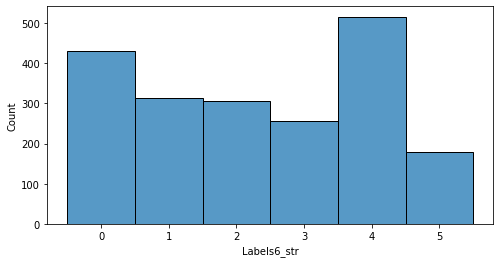

In [220]:
#Determining the amount of data in each cluster and the Silhouette score for 6 clusters

km6 = KMeans(n_clusters=6, random_state=48, init='k-means++').fit(X_tran)
X_km6 = X_tran.copy()
X_km6['Labels6'] = km6.labels_


score = silhouette_score(X_tran, km6.labels_, random_state=48)
print(f"Silhouette score: {score:0.3f}")


X_km6['Labels6_str']= X_km6.Labels6.astype(str)
X_km6 = X_km6.sort_values('Labels6_str')

plt.figure(figsize=(8, 4))
sns.histplot(X_km6.Labels6_str)
# plt.xlabel('Labels', fontsize=16);
# plt.ylabel('Counts', fontsize=16);
# plt.title('Histogram of Cluster Groups', fontsize=16)
# plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

In [221]:
#Let's scale the inputs for PCA, since Sex and Marital status values are between 0 and 1, we'll use MinMaxScaler
#This action converts the X dataframe to a numpy array so we need to convert it back to a dataframe

from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
temp = scaler.fit_transform(X)
X_tran = pd.DataFrame(temp, columns = ['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation', 'Settlement size'])

X_tran

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0.0,0.0,0.844828,0.666667,0.324781,0.5,1.0
1,1.0,1.0,0.068966,0.333333,0.420210,0.5,1.0
2,0.0,0.0,0.534483,0.333333,0.195144,0.0,0.0
3,0.0,0.0,0.465517,0.333333,0.496223,0.5,0.5
4,0.0,0.0,0.603448,0.333333,0.413842,0.5,0.5
...,...,...,...,...,...,...,...
1995,1.0,0.0,0.500000,0.333333,0.320595,0.0,0.0
1996,1.0,1.0,0.155172,0.333333,0.299460,0.5,0.0
1997,0.0,0.0,0.224138,0.000000,0.184871,0.0,0.0
1998,1.0,1.0,0.103448,0.333333,0.227162,0.0,0.0


In [222]:
#Performing PCA to convert 7 features to 3 in order to visualize the goodness of our clusters
#PCA converts dataframe to numpy array, so we need to transform it back to a dataframe

from sklearn.decomposition import PCA


pca = PCA(n_components=3, random_state=48)
temp = pca.fit_transform(X_tran)

X_pca = pd.DataFrame(temp, columns=['X1', 'X2', 'X3'])


km4_pca = KMeans(n_clusters=4, random_state=48, init='k-means++').fit(X_pca)
X_pca_km4 = X_pca.copy()
X_pca_km4['Labels4'] = km4_pca.labels_


X_pca_km4['Labels4_str']= X_pca_km4.Labels4.astype(str)
X_pca_km4 = X_pca_km4.sort_values('Labels4_str')

X_pca_km4

,X1,X2,X3,Labels4,Labels4_str
0,0.826086,0.354652,0.158422,0,0
718,0.847002,0.252769,0.145739,0,0
720,0.762099,0.203335,0.120733,0,0
730,0.688563,-0.046005,0.028629,0,0
738,0.919612,0.595345,0.258194,0,0
...,...,...,...,...,...
1442,-0.864146,-0.282163,-0.085551,3,3
1443,-0.798266,-0.024449,0.002657,3,3
1444,-0.880289,-0.253478,-0.087048,3,3
1434,-0.797262,-0.024607,0.003331,3,3


In [223]:
#Visualizing the data using 3 features and 4 clusters


import plotly.express as px


fig = px.scatter_3d(X_pca_km4, x='X1', y='X2', z='X3', color=X_pca_km4['Labels4_str'])
fig.show()

In [224]:
#let's also see the results for 6 clusters 

km6_pca = KMeans(n_clusters=6, random_state=48, init='k-means++').fit(X_pca)
X_pca_km6 = X_pca.copy()
X_pca_km6['Labels6'] = km6_pca.labels_


X_pca_km6['Labels6_str']= X_pca_km6.Labels6.astype(str)
X_pca_km6 = X_pca_km6.sort_values('Labels6_str')

X_pca_km6

,X1,X2,X3,Labels6,Labels6_str
1043,-0.520816,0.802646,0.263599,0,0
1000,-0.642062,0.417407,0.152664,0,0
340,-0.656087,0.360073,0.128098,0,0
1005,-0.569773,0.771149,0.266834,0,0
337,-0.534108,0.683961,0.228889,0,0
...,...,...,...,...,...
1023,-0.712071,0.169065,0.063199,5,5
1626,-0.873241,-0.286958,-0.092741,5,5
1353,-0.792543,0.045457,0.023603,5,5
1355,-0.799519,-0.021982,0.002210,5,5


In [226]:
#Visualizing the data using 3 features and 6 clusters


import plotly.express as px


fig = px.scatter_3d(X_pca_km6, x='X1', y='X2', z='X3', color=X_pca_km6['Labels6_str'])
fig.show()

#the figure shows that K-means with 6 clusters has done a relatively good job at clustering. 
#let's also try Agglomerative Hierarchical Clustering and Density Based Clustering (DBSCAN) Clustering

In [230]:
#Implementing DBSCAN clustering

from sklearn.cluster import DBSCAN 

db6 = DBSCAN(eps=0.6, min_samples=50).fit(X_tran)


print(min(db6.labels_))
print(max(db6.labels_))


score = silhouette_score(X_tran, db6.labels_, random_state=48)
print(f"Silhouette score: {score:0.3f}")


#DBSCAN does not perform well because the density in our data is not that strong
#in fact the Silhouette score only goes up when we use very large number of clusters
#label -1 represents outliers 

-1
3
Silhouette score: 0.395


In [231]:
#Implementing Agglomerative clustering with 4 clusters
#We put this process in try-except block since 'ward' only works with 'euclidean' distance.


from sklearn.cluster import AgglomerativeClustering 


def s_score(distance, linkage):
    ag4 = AgglomerativeClustering(n_clusters=4, affinity=distance, linkage=linkage).fit(X)
    score = silhouette_score(X, ag4.labels_, random_state=48)
    return score


distances = ['euclidean', 'l1', 'l2', 'manhattan', 'cosine']
linkages = ['ward', 'complete', 'average', 'single']


scores = {'dist':[], 'link':[], 'sScore':[]}
for i in distances:
    for j in linkages:
        try:
            score = s_score(i, j)
            scores['dist'].append(i)
            scores['link'].append(j)
            scores['sScore'].append(score)
        except:
            scores['dist'].append(i)
            scores['link'].append(j)
            scores['sScore'].append(np.nan)

            
scoring = pd.DataFrame(scores)
scoring.dropna(axis=0, inplace=True)
scoring.head()

,dist,link,sScore
0,euclidean,ward,0.531762
1,euclidean,complete,0.528703
2,euclidean,average,0.514481
3,euclidean,single,0.703858
5,l1,complete,0.437356


In [232]:
scoring[scoring['sScore'] == max(scoring['sScore'])]

,dist,link,sScore
3,euclidean,single,0.703858
7,l1,single,0.703858
11,l2,single,0.703858
15,manhattan,single,0.703858


In [233]:
#Implementing Agglomerative clustering with 6 clusters


def s_score(distance, linkage):
    ag6 = AgglomerativeClustering(n_clusters=6, affinity=distance, linkage=linkage).fit(X)
    score = silhouette_score(X, ag6.labels_, random_state=48)
    return score


distances = ['euclidean', 'l1', 'l2', 'manhattan', 'cosine']
linkages = ['ward', 'complete', 'average', 'single']


scores = {'dist':[], 'link':[], 'sScore':[]}
for i in distances:
    for j in linkages:
        try:
            score = s_score(i, j)
            scores['dist'].append(i)
            scores['link'].append(j)
            scores['sScore'].append(score)
        except:
            scores['dist'].append(i)
            scores['link'].append(j)
            scores['sScore'].append(np.nan)

            
scoring = pd.DataFrame(scores)
scoring.dropna(axis=0, inplace=True)
scoring.head()

,dist,link,sScore
0,euclidean,ward,0.513049
1,euclidean,complete,0.466864
2,euclidean,average,0.520025
3,euclidean,single,0.675684
5,l1,complete,0.519634


In [234]:
scoring[scoring['sScore'] == max(scoring['sScore'])]

,dist,link,sScore
3,euclidean,single,0.675684
7,l1,single,0.675684
11,l2,single,0.675684
15,manhattan,single,0.675684


In [ ]:
#Four clusters gives the highest silhouette_score of 0.704